### Lab 09-1 XOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

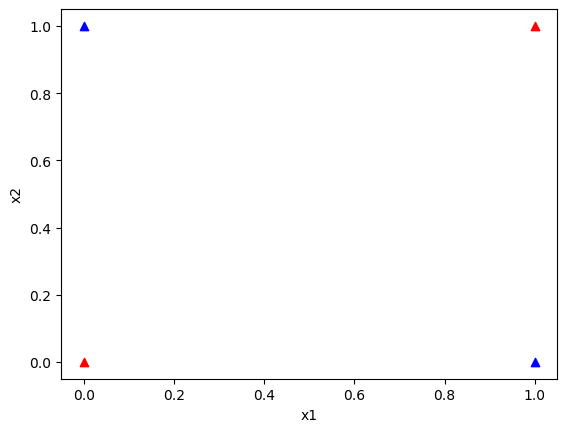

In [6]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

# x_data는 2차원 배열

y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# red = 0, blue = 1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
def preprocess_data(features, labels):
    features = tf.cast(featuresm tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [ ]:
W = tf.Variable(tf.zeros((2,1)), name = 'weight')
b = tf.Variable(tf.zeros((1,)), name = 'bias')
print(" W = {}, B = {}".format(W.numpy(), b.numpy()))

In [ ]:
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W ) + b))
    return hypothesis

### Cost function def.
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if  &  y=0
\end{align}
$$

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [ ]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [ ]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32))
    return accuracy

In [ ]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features, labels)
    return tape.gradient(loss_value, [W, b])

In [ ]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))